In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
rating_df = pd.read_csv('tourism_rating.csv')
tempat_df = pd.read_csv('tourism_with_id.csv')

In [9]:
rating_df.head(2)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2


In [10]:
tempat_df.head(2)

,Place_Id,Place_Name,Image_URL,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 12,Unnamed: 13
0,1.0,Monumen Nasional,https://raw.githubusercontent.com/jessicaflv29...,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1.0
1,2.0,Kota Tua,https://raw.githubusercontent.com/jessicaflv29...,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2.0


In [11]:
rating_df.info()
rating_df.duplicated().sum()
rating_df.isna().sum()
rating_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [16]:
cols_to_drop = ['Unnamed: 11','Unnamed: 12','Time_Minutes','Coordinate','Lat','Long','Description']
tempat_df = tempat_df.drop(columns=[c for c in cols_to_drop if c in tempat_df.columns])
tempat_df.info()
print("Jumlah duplikat:", tempat_df.duplicated().sum())
print("Jumlah missing:", tempat_df.isna().sum())
tempat_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    float64
 1   Place_Name   442 non-null    object 
 2   Image_URL    442 non-null    object 
 3   Category     437 non-null    object 
 4   City         434 non-null    object 
 5   Price        437 non-null    object 
 6   Rating       437 non-null    float64
 7   Unnamed: 13  432 non-null    float64
dtypes: float64(3), object(5)
memory usage: 27.8+ KB
Jumlah duplikat: 0
Jumlah missing: Place_Id        5
Place_Name      0
Image_URL       0
Category        5
City            8
Price           5
Rating          5
Unnamed: 13    10
dtype: int64


,Place_Id,Rating,Unnamed: 13
count,437.000000,437.000000,432.000000
mean,219.000000,4.312481,217.986111
std,126.295289,1.264757,126.293584
min,1.000000,-7.893346,1.000000
25%,110.000000,4.300000,108.750000
50%,219.000000,4.500000,217.500000
75%,328.000000,4.600000,327.250000
max,437.000000,5.000000,437.000000


In [17]:
Tempat_Jakarta_df = tempat_df[tempat_df['City']=='Jakarta']
Tempat_Jakarta_df = Tempat_Jakarta_df.drop('City', axis=1)
jumlahtempat = Tempat_Jakarta_df['Place_Id'].count()
Tempat_Jakarta_df.head()

,Place_Id,Place_Name,Image_URL,Category,Price,Rating,Unnamed: 13
0,1.0,Monumen Nasional,https://raw.githubusercontent.com/jessicaflv29...,Budaya,20000,4.6,1.0
1,2.0,Kota Tua,https://raw.githubusercontent.com/jessicaflv29...,Budaya,0,4.6,2.0
2,3.0,Dunia Fantasi,https://raw.githubusercontent.com/jessicaflv29...,Taman Hiburan,270000,4.6,3.0
3,4.0,Taman Mini Indonesia Indah (TMII),https://raw.githubusercontent.com/jessicaflv29...,Taman Hiburan,10000,4.5,4.0
4,5.0,Atlantis Water Adventure,https://raw.githubusercontent.com/jessicaflv29...,Taman Hiburan,94000,4.5,5.0


In [18]:
kolom = ['Category','Place_Name']
pivot_kategori_df = pd.pivot_table(Tempat_Jakarta_df[kolom], values=['Place_Name'], index='Category', aggfunc='nunique').reset_index()
pivot_kategori_df.sort_values(by='Place_Name', ascending=False, inplace=True)
pivot_kategori_df.rename(columns={'Place_Name': 'Jumlah'}, inplace=True)
print(pivot_kategori_df)

             Category  Jumlah
1              Budaya      32
4       Taman Hiburan      27
3  Pusat Perbelanjaan      10
0              Bahari       8
2          Cagar Alam       4
5       Tempat Ibadah       3


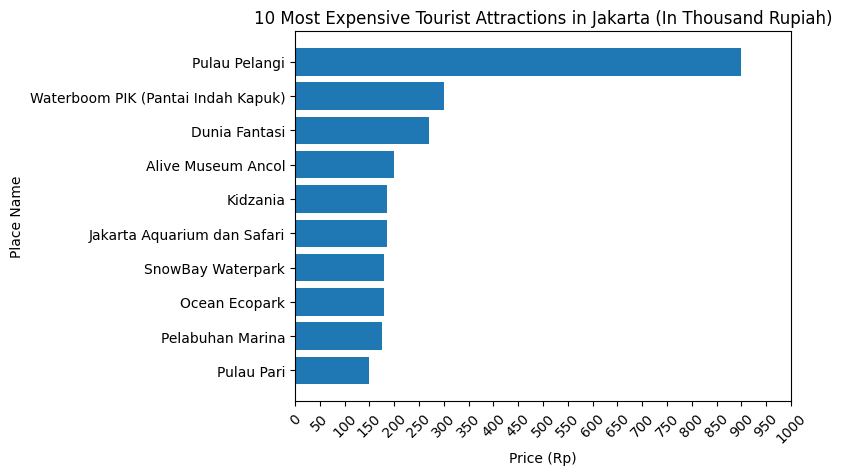

In [21]:
Tempat_Jakarta_df['Price'] = (
    Tempat_Jakarta_df['Price']
    .astype(str)               # jika ada nilai non-string
    .str.replace('[^0-9]', '', regex=True)  # hapus karakter non-digit
)
Tempat_Jakarta_df['Price'] = pd.to_numeric(Tempat_Jakarta_df['Price'], errors='coerce')

harga_rating_df = Tempat_Jakarta_df[['Place_Name', 'Price','Rating']]
harga_urut_df = harga_rating_df.sort_values(by='Price', ascending=True)

plt.barh(
    y=harga_urut_df['Place_Name'].tail(10),
    width=(harga_urut_df['Price']/1000).tail(10)
)
plt.title('10 Most Expensive Tourist Attractions in Jakarta (In Thousand Rupiah)')
plt.xticks(np.arange(0,1050,50), rotation=45)
plt.xlabel('Price (Rp)')
plt.ylabel('Place Name')
plt.show()


In [22]:
Tempat_Gratis_df = harga_rating_df[harga_rating_df['Price']==0]
Tempat_Gratis_df.sort_values(by='Rating', ascending=False, inplace=True)

Tempat_Gratis_df.count()
Tempat_Gratis_df.head(10)

/tmp/ipython-input-4112700924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tempat_Gratis_df.sort_values(by='Rating', ascending=False, inplace=True)


,Place_Name,Price,Rating
28,Wisata Kuliner Pecenongan,0,5.0
68,Freedom Library,0,5.0
48,Galeri Indonesia Kaya,0,4.8
22,Gereja Katedral,0,4.8
34,Grand Indonesia Mall,0,4.7
69,Perpustakaan Nasional,0,4.7
21,Masjid Istiqlal,0,4.7
43,Monumen Selamat Datang,0,4.7
56,Taman Lapangan Banteng,0,4.7
79,Plaza Indonesia,0,4.7


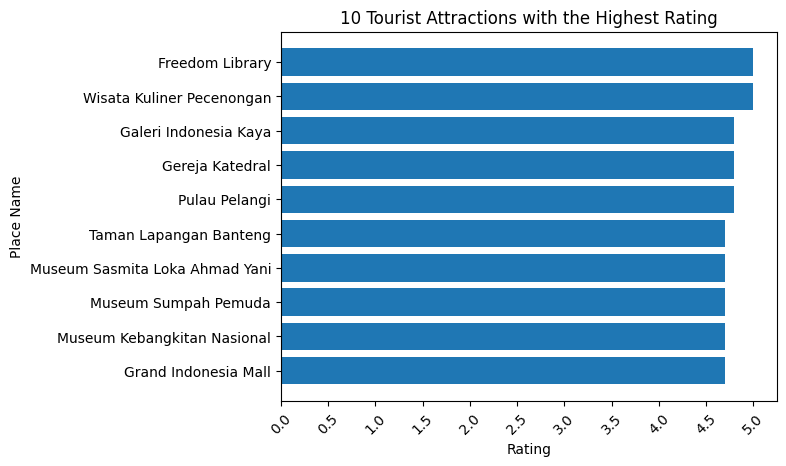

In [23]:
rating_tempat_df = harga_rating_df.sort_values(by='Rating', ascending=True)
plt.barh(y=rating_tempat_df['Place_Name'].tail(10), width=rating_tempat_df['Rating'].tail(10))
plt.title('10 Tourist Attractions with the Highest Rating')
plt.xlabel('Rating')
plt.xticks(np.arange(0,5.2,0.5), rotation=45)
plt.ylabel('Place Name')
plt.show()

In [24]:
korelasi = rating_tempat_df.corr(numeric_only=True)
print(korelasi)

           Price    Rating
Price   1.000000  0.023012
Rating  0.023012  1.000000


In [25]:
Tempat_Dikunjungi_df = pd.merge(
    left=Tempat_Jakarta_df,
    right=rating_df,
    how='left',
    left_on='Place_Id',
    right_on='Place_Id'
)

Banyak_Wisatawan_df = Tempat_Dikunjungi_df.groupby(by='Place_Name').agg({
    'Place_Id': 'count',
    'Rating': 'mean'
}).sort_values(by='Place_Id', ascending=False)
Banyak_Wisatawan_df.rename(columns={'Place_Id': 'Number_of_visit(s)'}, inplace=True)
Banyak_Wisatawan_df.head(10)

,Number_of_visit(s),Rating
Place_Name,,
Wisata Kuliner Pecenongan,33,5.0
Klenteng Jin De Yuan,32,4.5
Ocean Ecopark,30,4.0
Hutan Kota Srengseng,30,4.3
Pantai Ancol,30,4.4
Rumah Sipitung,30,4.5
The Escape Hunt,30,4.4
Skyrink - Mall Taman Anggrek,29,4.5
Taman Situ Lembang,29,4.5


                    Number_of_visit(s)    Rating
Number_of_visit(s)            1.000000  0.081458
Rating                        0.081458  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

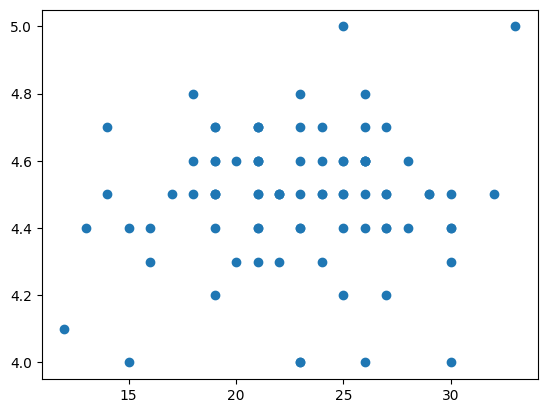

In [26]:
print(Banyak_Wisatawan_df.corr())

plt.scatter(x=Banyak_Wisatawan_df['Number_of_visit(s)'], y=Banyak_Wisatawan_df['Rating'])
plt.show

In [31]:
import pandas as pd
import folium
from folium.plugins import Search, MarkerCluster, FeatureGroupSubGroup
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import FileLink, display

# 1. LOAD DATA
places = pd.read_csv('tourism_with_id.csv')
ratings = pd.read_csv('tourism_rating.csv')
users = pd.read_csv('user.csv')
# Filter Jakarta
df = places[places['City'] == 'Jakarta'].dropna(subset=['Lat','Long']).copy()

# Wisatawan
rating_user = pd.merge(ratings, users, on='User_Id')
origin_stats = rating_user.groupby('Place_Id')['Location'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else 'Tidak diketahui'
).reset_index()
origin_stats.columns = ['Place_Id','Dominant_Origin']
df = pd.merge(df, origin_stats, on='Place_Id', how='left')

# Jumlah ulasan
rating_counts = ratings['Place_Id'].value_counts().reset_index()
rating_counts.columns = ['Place_Id','Total_Reviews']
df = pd.merge(df, rating_counts, on='Place_Id', how='left')
df['Total_Reviews'] = df['Total_Reviews'].fillna(0)

# Keterangan Statistik
total_tempat = len(df)
avg_rating = df['Rating'].mean()
kategori_dominan = df['Category'].mode()[0]


# 2. UNSUPERVISED LEARNING (K-MEANS)
# a. Harga
df['Price'] = df['Price'].astype(str).str.replace('[^0-9]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)
df['Price_log'] = np.log1p(df['Price'])
fitur = df[['Rating', 'Price_log']].copy()
fitur['Rating'] = fitur['Rating'] * 2  # Rating lebih penting
X_scaled = StandardScaler().fit_transform(fitur)

# b. K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
df['Zona'] = kmeans.fit_predict(X_scaled)

cluster_stat = df.groupby('Zona')[['Rating','Price']].mean().reset_index()
cluster_stat['score'] = cluster_stat['Rating'] + cluster_stat['Price']/df['Price'].max()
cluster_stat = cluster_stat.sort_values('score', ascending=False).reset_index(drop=True)

# c. Label
label_warna = [
    '<span style="color:#cda4f0">●</span> Populer Premium',
    '<span style="color:#90ee90">●</span> Populer Terjangkau',
    '<span style="color:#ffb6c1">●</span> Wisata Lokal/Underrated'
]
zona_label_cluster = {row['Zona']: label_warna[i] for i, row in cluster_stat.iterrows()}
df['Zona_Label_Cluster'] = df['Zona'].map(zona_label_cluster)
def label_fix(row):
    if row['Rating'] >= 4.5 and row['Price'] >= 100000:
        return '<span style="color:#cda4f0">●</span> Populer Premium'
    elif row['Rating'] >= 4.5:
        return '<span style="color:#90ee90">●</span> Populer Terjangkau'
    else:
        return '<span style="color:#ffb6c1">●</span> Wisata Lokal/Underrated'

df['Zona_Label_Item'] = df.apply(label_fix, axis=1)
df['Zona_Label'] = df['Zona_Label_Item']


# 3. SETUP PETA
m = folium.Map(
    location=[df['Lat'].mean(), df['Long'].mean()],
    zoom_start=12,
    tiles='CartoDB Voyager',
    control_scale=True
)
cluster_main = MarkerCluster(control=False).add_to(m)
search_group = folium.FeatureGroup(name="🔍 Pencarian", show=False).add_to(m)


# Visualisasi Kategori
for kat in df['Category'].unique():
    sub = FeatureGroupSubGroup(cluster_main, name=kat)
    m.add_child(sub)

    for _, row in df[df['Category'] == kat].iterrows():
        total_rev = row['Total_Reviews']

        # Warna popularitas
        if total_rev > 25:
            color = 'red'
        elif total_rev > 15:
            color = 'orange'
        else:
            color = 'blue'

        popup = f"""
        <div style="width:230px;font-family:Segoe UI;font-size:12px">
        <b>{row['Place_Name']}</b><br>
        <span style="color:gray">{row['Category']}</span>
        <hr style="margin:4px 0">

        <img src="{row['Image_URL']}"
             style="width:100%;height:120px;
             object-fit:cover;
             border-radius:6px;
             margin-bottom:6px;"
             onerror="this.style.display='none'">

        <div style="margin:6px 0;">
        ⭐ <b>{row['Rating']}</b>
        &nbsp; 👤 {int(total_rev)} ulasan
        </div>

        <b>Zona Wisata:</b><br>
        {row['Zona_Label']}<br>

        <b>Mayoritas pengunjung:</b> {row['Dominant_Origin']}
        <hr style="margin:4px 0">
        <b>Rp {int(row['Price']):,}</b>
        </div>
        """

        folium.Marker(
            location=[row['Lat'], row['Long']],
            popup=popup,
            tooltip=row['Place_Name'],
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(sub)

        folium.CircleMarker(
            location=[row['Lat'], row['Long']],
            radius=0,
            tooltip=row['Place_Name'],
            fill_opacity=0
        ).add_to(search_group)

# Dashboard
dashboard = f"""
<div style="
position:fixed;
top:10px;
right:150px;
background:white;
padding:10px 12px;
border-radius:8px;
z-index:900;
width:250px;
box-shadow:0 0 6px rgba(0,0,0,0.2);
font-family:Segoe UI;
font-size:12px;
line-height:1.4;
">
<div style="text-align:center;font-weight:850;font-size:18px;">
Dashboard Destinasi Wisata Jakarta
</div>
<hr style="margin:6px 0">
<b>Total Destinasi</b><br>
{total_tempat} lokasi
<hr style="margin:6px 0">
<b>Rata-rata Rating</b><br>
<span style="color:#f39c12">{avg_rating:.2f} / 5.0</span>
<hr style="margin:6px 0">
<b>Kategori Dominan</b><br>
{kategori_dominan}
</div>
"""
m.get_root().html.add_child(folium.Element(dashboard))


# Legenda
#POPULARITAS
legend_popularitas = """
<div id="legend-popularitas" style="
position:fixed;
bottom:40px;
left:30px;
background:white;
padding:8px;
border-radius:8px;
font-size:12px;
z-index:900;
font-family:Segoe UI;
">
<b>POPULARITAS</b><br>
<span style="color:#d73027">●</span> Ramai <i>(&gt; 25 ulasan)</i><br>
<span style="color:#fc8d59">●</span> Sedang <i>(15 – 25 ulasan)</i><br>
<span style="color:#4575b4">●</span> Normal <i>(&lt; 15 ulasan)</i>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_popularitas))

#ZONA WISATA
legend_zona = """
<div id="legend-zona" style="
position:fixed;
bottom:40px;
left:190px;
background:white;
padding:8px;
border-radius:8px;
font-size:12px;
z-index:900;
font-family:Segoe UI;
">
<b>ZONA WISATA</b><br>
<span style="color:#cda4f0">●</span> Populer Premium<br>
<span style="color:#90ee90">●</span> Populer Terjangkau<br>
<span style="color:#ffb6c1">●</span> Wisata Lokal/Underrated
</div>
"""
m.get_root().html.add_child(folium.Element(legend_zona))

#LAYER
toggle_script = """
<script>
function toggleLegend(id) {
  var el = document.getElementById(id);
  el.style.display = (el.style.display === "none") ? "block" : "none";
}
</script>

<div style="
position:fixed;
top:120px;
left:10px;
background:white;
padding:8px;
border-radius:8px;
font-size:10px;
z-index:900;
font-family:Segoe UI;
">
<b>LEGENDA</b><br>
<input type="checkbox" checked onclick="toggleLegend('legend-popularitas')">
 Popularitas<br>
<input type="checkbox" checked onclick="toggleLegend('legend-zona')">
 Zona Wisata
</div>
"""
m.get_root().html.add_child(folium.Element(toggle_script))

# FITUR PETA
Search(
    layer=search_group,
    search_label='tooltip',
    placeholder='Cari lokasi wisata...'
).add_to(m)

folium.LayerControl(collapsed=False).add_to(m)

# 4. SIMPAN HTML
m.save("Destinasi_Wisata_Jakarta.html")